In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
from google.colab import files
file=files.upload()

Saving tic-tac-toe.csv to tic-tac-toe.csv


In [ ]:
 df = pd.read_csv("tic-tac-toe.csv")
 df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
le_obj = LabelEncoder()

for i in df.columns:
  df[i]=le_obj.fit_transform(df[i])
print(df)

attributes = list(df.columns)
print(attributes)
attributes.remove('class')

X = df[attributes].values.astype(np.float32) #input dataset
y = df['class'].tolist()       #output dataset

#shifting the distribution of each attribute to have a mean of zero and a standard deviation of one
scaler=StandardScaler()
X=scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape,"\n",X_test.shape)

     top-left-square  top-middle-square  ...  bottom-right-square  class
0                  2                  2  ...                    1      1
1                  2                  2  ...                    1      1
2                  2                  2  ...                    2      1
3                  2                  2  ...                    0      1
4                  2                  2  ...                    0      1
..               ...                ...  ...                  ...    ...
953                1                  2  ...                    2      0
954                1                  2  ...                    2      0
955                1                  2  ...                    2      0
956                1                  2  ...                    2      0
957                1                  1  ...                    2      0

[958 rows x 10 columns]
['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-s

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit_S(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_S(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all samples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        
        # return the most common class label
        #most_common(n) method which produces a sequence of the n most frequently encountered input values and their respective counts as a tuple
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

    def euclidean_distance(self,x1, x2):
        #√Σ(x1-x2)² 
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
k = 7
clf = KNN(k=k)
clf.fit_S(X_train, y_train)
prediction1 = clf.predict_S(X_test)
print("KNN classification accuracy ", clf.accuracy(y_test, prediction1))

KNN classification accuracy  0.8541666666666666


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
prediction2=knn.predict(X_test)
print("knn classification accuracy using inbuilt method",accuracy_score(prediction2, y_test))

knn classification accuracy using inbuilt method 0.8541666666666666


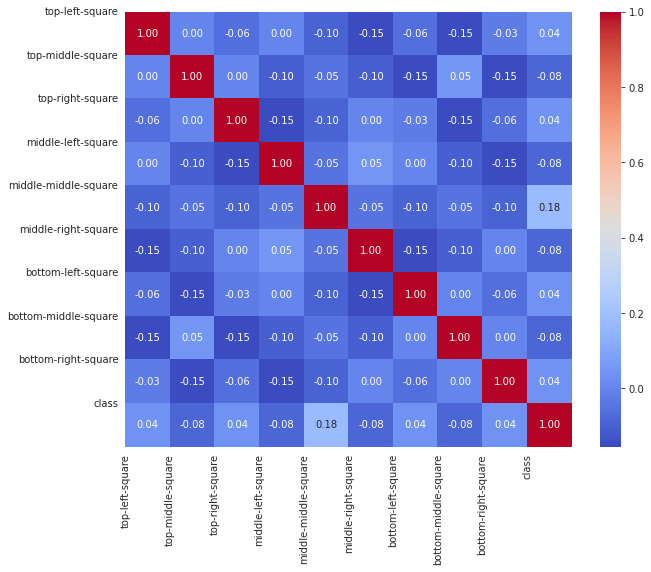

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')   
cor=df.corr()                                           #create an object of corr()
fig,ax=plt.subplots(figsize=(10,8))                     #sets plot size
sns.heatmap(cor,cmap='coolwarm',annot=True,fmt=".2f")   #create a heatmap annote=true displays values in grid 
plt.xticks(range(len(cor.columns)),cor.columns)         #apply xticks
plt.yticks(range(len(cor.columns)),cor.columns)         #apply y ticks
plt.show()